In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [43]:
students = pd.read_csv('../datasets/Student_performance_data _.csv')

In [44]:
students.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [45]:
students.drop(columns=['StudentID'])

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [46]:
students.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [48]:
# Mapping dictionaries for each categorical column
label_maps = {
    "Gender": {
        0: "Male",
        1: "Female"
    },
    "Ethnicity": {
        0: "Caucasian",
        1: "African American",
        2: "Asian",
        3: "Other"
    },
    "ParentalEducation": {
        0: "None",
        1: "High School",
        2: "Some College",
        3: "Bachelor's",
        4: "Higher"
    },
    "ParentalSupport": {
        0: "None",
        1: "Low",
        2: "Moderate",
        3: "High",
        4: "Very High"
    },
    "Tutoring": {0: "No", 1: "Yes"},
    "Extracurricular": {0: "No", 1: "Yes"},
    "Sports": {0: "No", 1: "Yes"},
    "Music": {0: "No", 1: "Yes"},
    "Volunteering": {0: "No", 1: "Yes"},
    "GradeClass": {
        0: "A",
        1: "B",
        2: "C",
        3: "D",
        4: "F"
    }
}
# Column descriptions (based on your dataset dictionary)
column_descriptions = {
    "StudentID": "Unique identifier for each student (1001–3392)",
    "Age": "Age of the student (15–18)",
    "Gender": "Gender of the student (0 = Male, 1 = Female)",
    "Ethnicity": "Ethnicity (0 = Caucasian, 1 = African American, 2 = Asian, 3 = Other)",
    "ParentalEducation": "Parental education level (0 = None, 4 = Higher)",
    "StudyTimeWeekly": "Weekly study time in hours (0–20)",
    "Absences": "Number of school absences (0–30)",
    "Tutoring": "Tutoring status (0 = No, 1 = Yes)",
    "ParentalSupport": "Level of parental support (0 = None, 4 = Very High)",
    "Extracurricular": "Participation in extracurricular activities (0 = No, 1 = Yes)",
    "Sports": "Participation in sports (0 = No, 1 = Yes)",
    "Music": "Participation in music (0 = No, 1 = Yes)",
    "Volunteering": "Participation in volunteering (0 = No, 1 = Yes)",
    "GPA": "Grade Point Average (2.0–4.0)",
    "GradeClass": "Grade classification (0 = A, 1 = B, 2 = C, 3 = D, 4 = F)"
}

def plot_multiple_hists(df, columns, label_maps=None, column_descriptions=None, ncols=3, figsize=(15, 8)):
    """
    Creates subplots of histograms / countplots side-by-side using your label maps and descriptions.
    """
    nrows = math.ceil(len(columns) / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()

    for i, col in enumerate(columns):
        ax = axes[i]
        col_data = df[col]

        # Apply mapping if exists
        if label_maps and col in label_maps:
            col_data = pd.to_numeric(col_data, errors='coerce').fillna(-1).astype(int)
            data = col_data.map(label_maps[col])
            plot_type = "categorical"
        else:
            data = col_data
            plot_type = "numeric" if pd.api.types.is_numeric_dtype(col_data) else "categorical"

        desc = column_descriptions.get(col, col)

        if plot_type == "numeric":
            sns.histplot(data.dropna(), bins=10, kde=True, color='skyblue', edgecolor='black', ax=ax)
            ax.set_ylabel("Frequency")
        else:
            sns.countplot(x=data, color='lightgreen', ax=ax)
            ax.set_ylabel("Count")

        ax.set_xlabel(col)
        ax.set_title(f"{col} — {desc}", fontsize=10)

    # Hide any unused axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

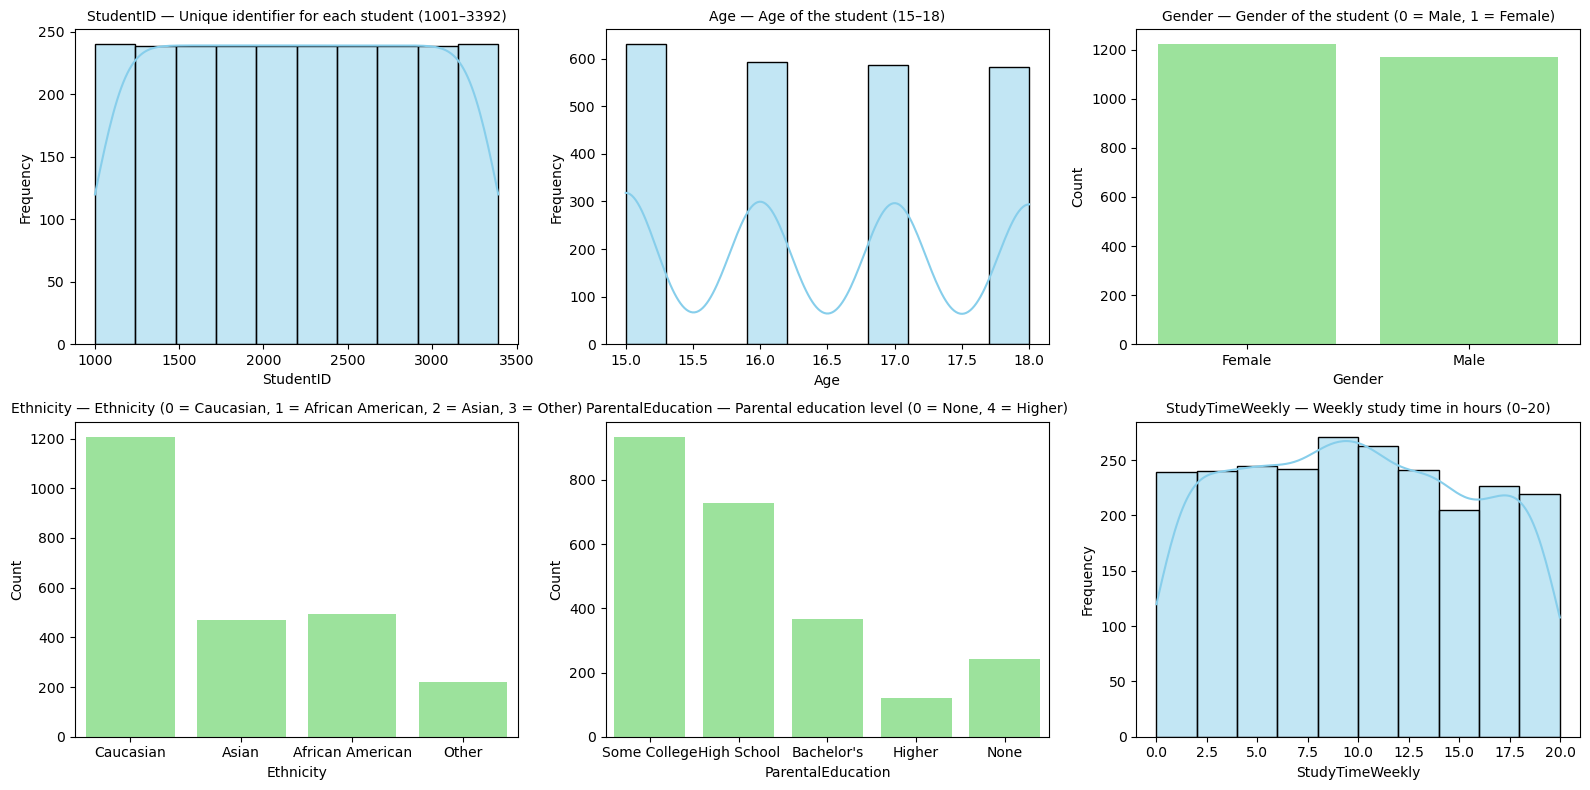

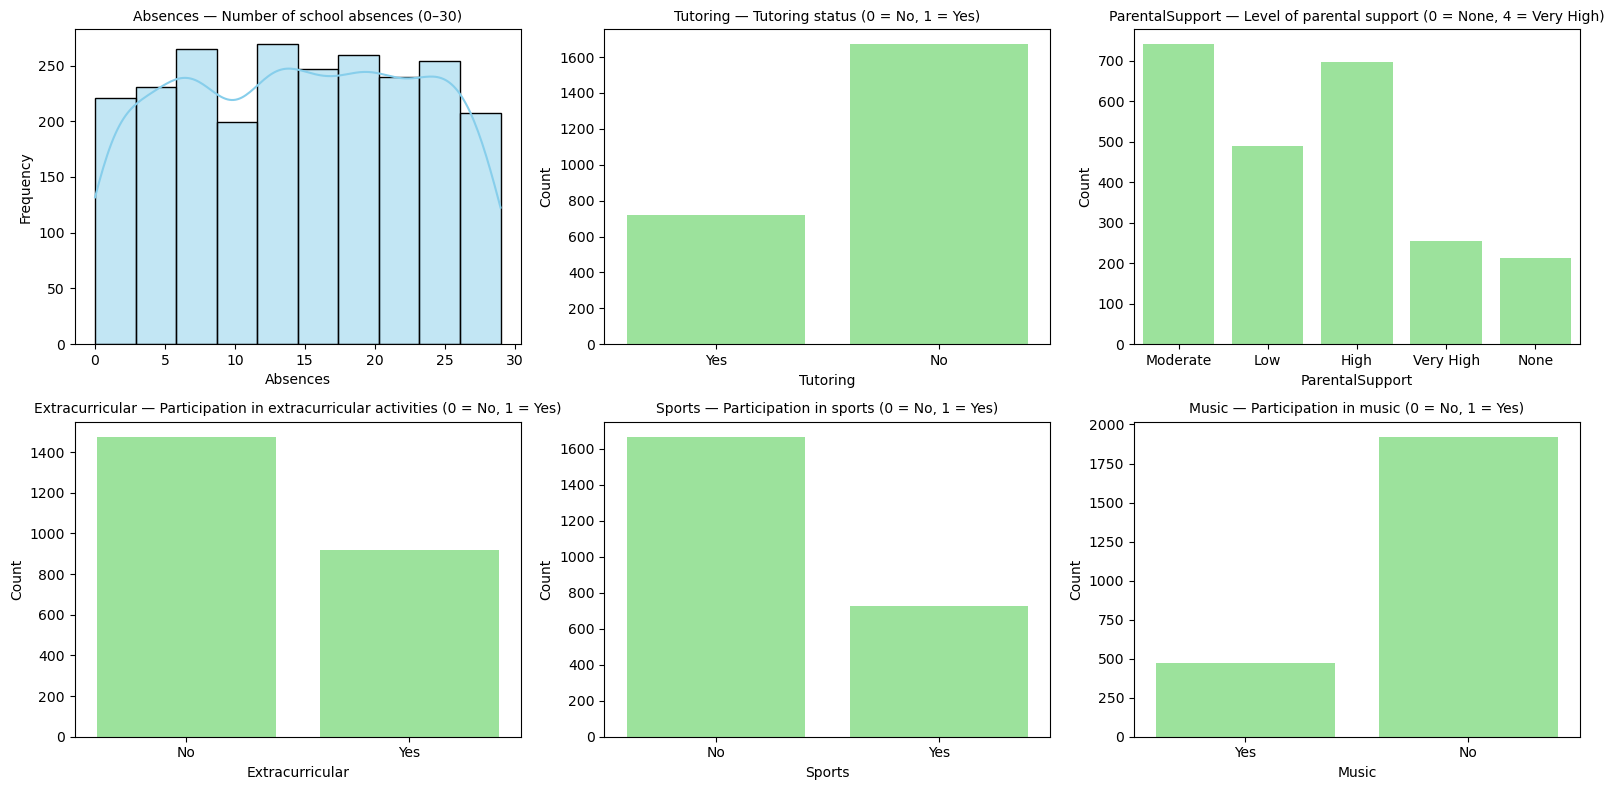

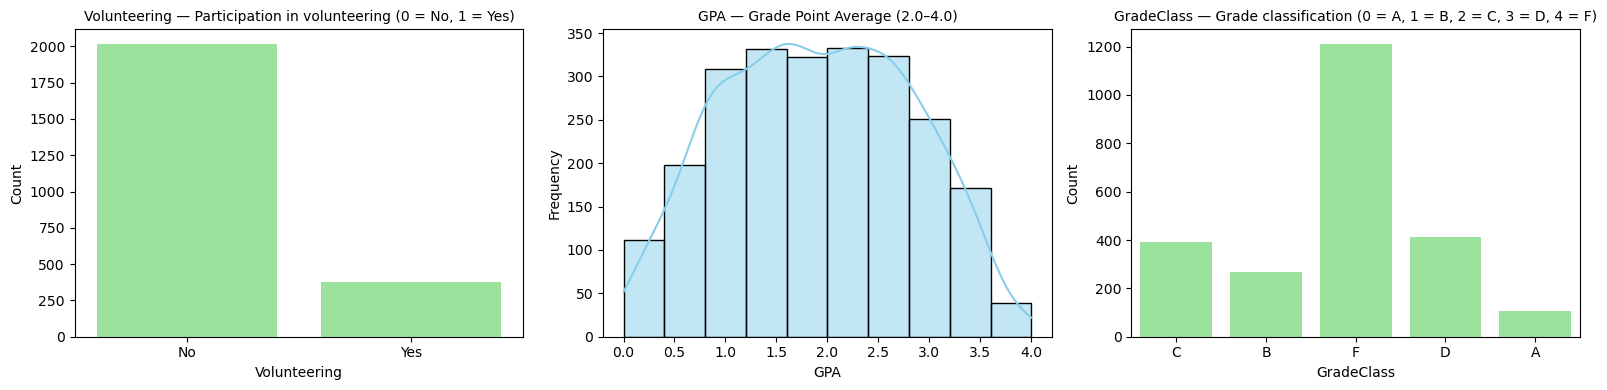

In [66]:
plot_multiple_hists(
    students,
    columns=students.columns[:6],
    label_maps=label_maps,
    column_descriptions=column_descriptions,
    ncols=3,
    figsize=(16, 8)
)
plot_multiple_hists(
    students,
    columns=students.columns[6:12],
    label_maps=label_maps,
    column_descriptions=column_descriptions,
    ncols=3,
    figsize=(16, 8)
)

plot_multiple_hists(
    students,
    columns=students.columns[12:],
    label_maps=label_maps,
    column_descriptions=column_descriptions,
    ncols=3,
    figsize=(16, 4)
)